In [1]:
import sys
#sys.path.append('..')
sys.path.append('D:/ATLData/Documents/GitHub/NWIS')
sys.path.append('/Users/aleaf/Documents/GitHub/NWIS')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import fiona
from shapely.geometry import Point, shape
from nwis import NWIS
from GISops import project
from GISio import df2shp

% matplotlib inline

### shapefile of study area

In [2]:
# input files
extent_shp = 'stlbasin.shp' # polygon of study area
epsg = 26915

### reproject the study area polygon to lat/lon

In [3]:
extent_poly = shape(fiona.open(extent_shp).next()['geometry'])
extent_poly_ll = project(extent_poly, "+init=epsg:{}".format(epsg), "+init=epsg:4269")
extent_poly_ll.bounds

(-93.20541291180457, 46.56925900047171, -91.43979489835318, 47.80881846853901)

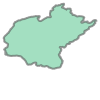

In [4]:
extent_poly_ll

### instantiate NWIS object using polygon
* fetches inventory tables of all dv and misc field measurements within the polygon
* `get_gw_sites` and `get_sw_sites` fetches all daily values and field measurements for groundwater and surface water (default=True)

In [5]:
nwis = NWIS(extent=extent_poly_ll, get_gw_sites=False)

Fetching site info...


### field measurements inventory table

In [6]:
nwis.field_sites.head()

,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,district_cd,...,peak_begin_date,peak_end_date,peak_count_nu,qw_begin_date,qw_end_date,qw_count_nu,sv_begin_date,sv_end_date,sv_count_nu,geometry
site_no,,,,,,,,,,,,,,,,,,,,,
4015410,4015410,"MILLER CREEK NEAR MOUTH AT DULUTH, MN",ST,46.761329,-92.129357,M,S,NAD27,NAD83,27,...,1993-06-24,1993-06-24,1,--,--,0,1991-05-21,1993-10-13,28,POINT (-92.12935709999999 46.76132929)
4015415,4015415,LAKE SUPERIOR TRIBUTARY AT W.9TH ST. IN DULUTH...,ST,46.757441,-92.157135,M,S,NAD27,NAD83,27,...,2001-04-23,2016-03-16,16,--,--,0,2000-05-08,2016-03-15,14,POINT (-92.15713529999999 46.75744077)
4015430,4015430,"ST. LOUIS R BLW SEVEN BEAVER LK NR FAIRBANKS, MN",ST,47.491389,-91.845556,G,1,NAD83,NAD83,27,...,--,--,0,1976-03-08,2016-08-09,17,1976-07-09,2016-08-09,21,POINT (-91.8455556 47.49138889)
4015438,4015438,"ST. LOUIS RIVER NEAR SKIBO, MN",ST,47.481111,-92.040000,M,S,NAD83,NAD83,27,...,2012-06-24,2016-04-25,5,1976-03-23,2016-08-08,22,1970-10-06,2017-03-07,86,POINT (-92.04000000000001 47.4811111)
4015439,4015439,"ST. LOUIS RIVER ABV. CO. HWY. 110 NR SKIBO, MN",ST,47.467472,-91.940167,G,1,NAD83,NAD83,27,...,--,--,0,2012-09-25,2016-08-09,9,2013-06-18,2013-06-18,1,POINT (-91.94016670000001 47.4674722)


### daily values sites inventory table

In [7]:
nwis.dv_sites.head()

,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,coord_datum_cd,dec_coord_datum_cd,district_cd,...,peak_begin_date,peak_end_date,peak_count_nu,qw_begin_date,qw_end_date,qw_count_nu,sv_begin_date,sv_end_date,sv_count_nu,geometry
site_no,,,,,,,,,,,,,,,,,,,,,
4015410,4015410,"MILLER CREEK NEAR MOUTH AT DULUTH, MN",ST,46.761329,-92.129357,M,S,NAD27,NAD83,27,...,1993-06-24,1993-06-24,1.0,--,--,0.0,1991-05-21,1993-10-13,28.0,POINT (-92.12935709999999 46.76132929)
4015438,4015438,"ST. LOUIS RIVER NEAR SKIBO, MN",ST,47.481111,-92.040000,M,S,NAD83,NAD83,27,...,2012-06-24,2016-04-25,5.0,1976-03-23,2016-08-08,22.0,1970-10-06,2017-03-07,86.0,POINT (-92.04000000000001 47.4811111)
4015455,4015455,"SOUTH BRANCH PARTRIDGE RIVER NEAR BABBITT, MN",ST,47.567420,-91.934888,M,U,NAD27,NAD83,27,...,1977-09-24,1980-04-19,4.0,1976-03-24,2014-10-29,11.0,1974-09-06,2006-07-12,11.0,POINT (-91.9348876 47.5674202)
4015475,4015475,"PARTRIDGE RIVER ABV COLBY LAKE AT HOYT LAKES, MN",ST,47.527146,-92.122673,M,U,NAD27,NAD83,27,...,1979-04-22,1988-08-25,10.0,1979-04-24,2014-10-29,6.0,1974-09-17,2006-07-12,98.0,POINT (-92.1226729 47.52714617)
4015500,4015500,"SECOND CREEK NEAR AURORA, MN",ST,47.523536,-92.193231,M,S,NAD27,NAD83,27,...,1955-04-12,1980-09-20,26.0,1955-09-27,1963-10-03,120.0,1955-03-29,1976-08-27,127.0,POINT (-92.19323089 47.5235359)


### write shapefiles of the inventory tables
* `shapely Points` were created from the lat/lon coordinates when the tables were assembled; these are used to write the feature geometries for the shapefiles

In [8]:
df2shp(nwis.dv_sites, 'dv_sites.shp', epsg=4269)
df2shp(nwis.field_sites, 'misc_sites.shp', epsg=4269)

writing dv_sites.shp...
writing misc_sites.shp...


### get daily values for a list of sites

In [9]:
sites = nwis.dv_sites.site_no.tolist()[0:2]
sites

[4015410, 4015438]

In [10]:
dvs = nwis.get_all_dvs(sites, start_date='1990-01-01')
dvs.keys()

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=04015410&startDT=1990-01-01&parameterCd=00060
http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=04015438&startDT=1990-01-01&parameterCd=00060
Log of query saved to retrieved_00060_dvs_log_20170320110307.csv


dict_keys([4015410, 4015438])

In [11]:
dvs[4015410].head()

,agency_cd,site_no,datetime,72572_00060_00003,72572_00060_00003_cd
datetime,,,,,
1992-09-25,USGS,4015410,1992-09-25,1.2,A
1992-09-26,USGS,4015410,1992-09-26,1.3,A
1992-09-27,USGS,4015410,1992-09-27,1.3,A
1992-09-28,USGS,4015410,1992-09-28,1.2,A
1992-09-29,USGS,4015410,1992-09-29,1.2,A


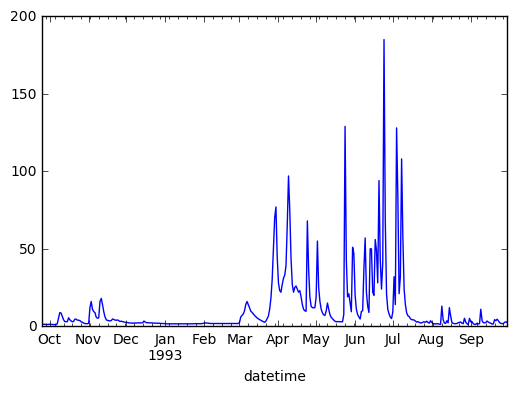

In [12]:
ax = dvs[4015410]['72572_00060_00003'].plot()

### get a single site

In [13]:
df = nwis.get_dvs(4015475)
df.head()

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=04015475&startDT=1880-01-01&parameterCd=00060


,agency_cd,site_no,datetime,72578_00060_00003,72578_00060_00003_cd
datetime,,,,,
1978-09-19,USGS,4015475,1978-09-19,143.0,A
1978-09-20,USGS,4015475,1978-09-20,125.0,A
1978-09-21,USGS,4015475,1978-09-21,100.0,A
1978-09-22,USGS,4015475,1978-09-22,80.0,A
1978-09-23,USGS,4015475,1978-09-23,83.0,A


### just get the url for dvs for a site
(`start_date` is 1880-01-01 by default; `end_date` is `None` by default)

In [14]:
url = nwis.make_dv_url(4015475)
url

http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=04015475&startDT=1880-01-01&parameterCd=00060


'http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=04015475&startDT=1880-01-01&parameterCd=00060'

## Fetch some miscellaneous measurements

In [15]:
sites = nwis.field_sites.site_no.tolist()[:5]
sites

[4015410, 4015415, 4015430, 4015438, 4015439]

In [16]:
fm = nwis.get_all_measurements(sites)

4015410
http://nwis.waterdata.usgs.gov/nwis/measurements?site_no=04015410&agency_cd=USGS&format=rdb
4015415
http://nwis.waterdata.usgs.gov/nwis/measurements?site_no=04015415&agency_cd=USGS&format=rdb
4015430
http://nwis.waterdata.usgs.gov/nwis/measurements?site_no=04015430&agency_cd=USGS&format=rdb
4015438
http://nwis.waterdata.usgs.gov/nwis/measurements?site_no=04015438&agency_cd=USGS&format=rdb
4015439
http://nwis.waterdata.usgs.gov/nwis/measurements?site_no=04015439&agency_cd=USGS&format=rdb
Log of query saved to retrieved_measurements_log_20170320110317.csv


In [17]:
fm.head()

agency_cd  site_no measurement_nu  \
site_no datetime                                                
4015410 1991-05-21 14:30:00      USGS  4015410              2   
        1992-05-12 11:00:00      USGS  4015410              1   
        1992-06-01 10:45:00      USGS  4015410              3   
        1992-06-03 07:35:00      USGS  4015410              4   
        1992-06-17 09:40:00      USGS  4015410              5   

                                 measurement_dt tz_cd q_meas_used_fg party_nm  \
site_no datetime                                                                
4015410 1991-05-21 14:30:00 1991-05-21 14:30:00   CDT            Yes      GRM   
        1992-05-12 11:00:00 1992-05-12 11:00:00   CDT            Yes      WAG   
        1992-06-01 10:45:00 1992-06-01 10:45:00   CDT            Yes      HDB   
        1992-06-03 07:35:00 1992-06-03 07:35:00   CDT            Yes      HDB   
        1992-06-17 09:40:00 1992-06-17 09:40:00   CDT            Yes      HDB   

                            site_visit_coll_agency_cd  gage_height_va  \
site_no datetime                                                        
4015410 1991-05-21 14:30:00                      USGS             NaN   
        1992-05-12 11:00:00                      USGS             NaN   
        1992-06-01 10:45:00                      USGS            1.33   
        1992-06-03 07:35:00                      USGS            1.22   
        1992-06-17 09:40:00                      USGS            1.82   

                             discharge_va  current_rating_nu  shift_adj_va  \
site_no datetime                                                             
4015410 1991-05-21 14:30:00          4.10                NaN           NaN   
        1992-05-12 11:00:00         55.20                NaN           NaN   
        1992-06-01 10:45:00          3.32                NaN           NaN   
        1992-06-03 07:35:00          1.55                NaN           NaN   
        1992-06-17 09:40:00         25.70                NaN           NaN   

                             diff_from_rating_pc measured_rating_diff  \
site_no datetime                                                        
4015410 1991-05-21 14:30:00                  NaN                 Fair   
        1992-05-12 11:00:00                  NaN                 Good   
        1992-06-01 10:45:00                  NaN                 Good   
        1992-06-03 07:35:00                  NaN                 Good   
        1992-06-17 09:40:00                  NaN                 Good   

                             gage_va_change  gage_va_time control_type_cd  \
site_no datetime                                                            
4015410 1991-05-21 14:30:00            0.00           0.3     DebrisLight   
        1992-05-12 11:00:00           -0.01           0.5           Clear   
        1992-06-01 10:45:00            0.00           0.5           Clear   
        1992-06-03 07:35:00            0.00           0.4           Clear   
        1992-06-17 09:40:00           -0.01           1.8           Clear   

                            discharge_cd  
site_no datetime                          
4015410 1991-05-21 14:30:00         MEAS  
        1992-05-12 11:00:00         MEAS  
        1992-06-01 10:45:00         MEAS  
        1992-06-03 07:35:00         MEAS  
        1992-06-17 09:40:00         MEAS

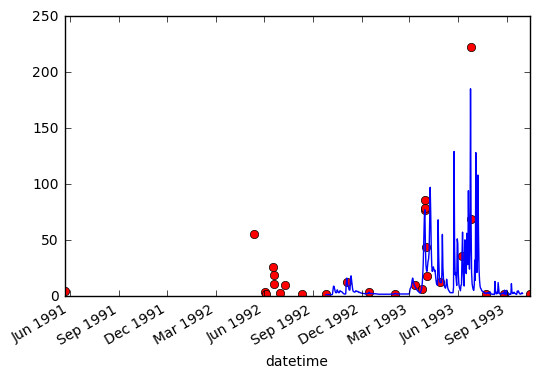

In [18]:
ax = fm.loc[4015410, 'discharge_va'].plot(lw=0, marker='o', color='r')
dvs[4015410]['72572_00060_00003'].plot(ax=ax)